In [1]:
import pandas as pd

# Чтение данных из файла
file_path = 'housing.csv'
df = pd.read_csv(file_path)

# Проверка данных
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


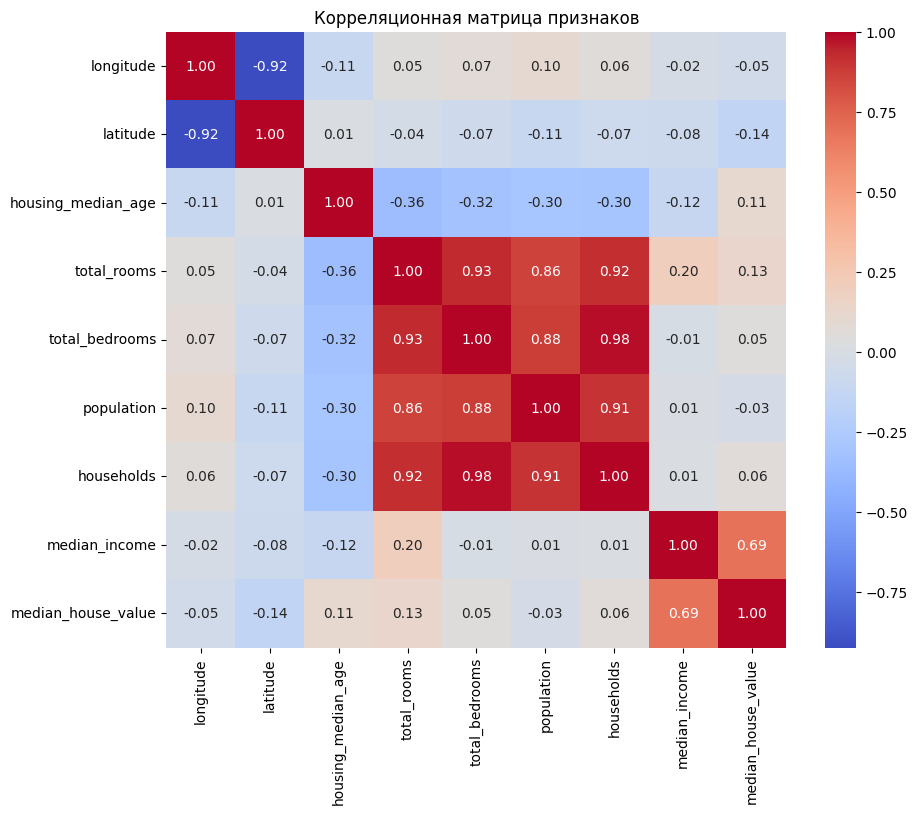

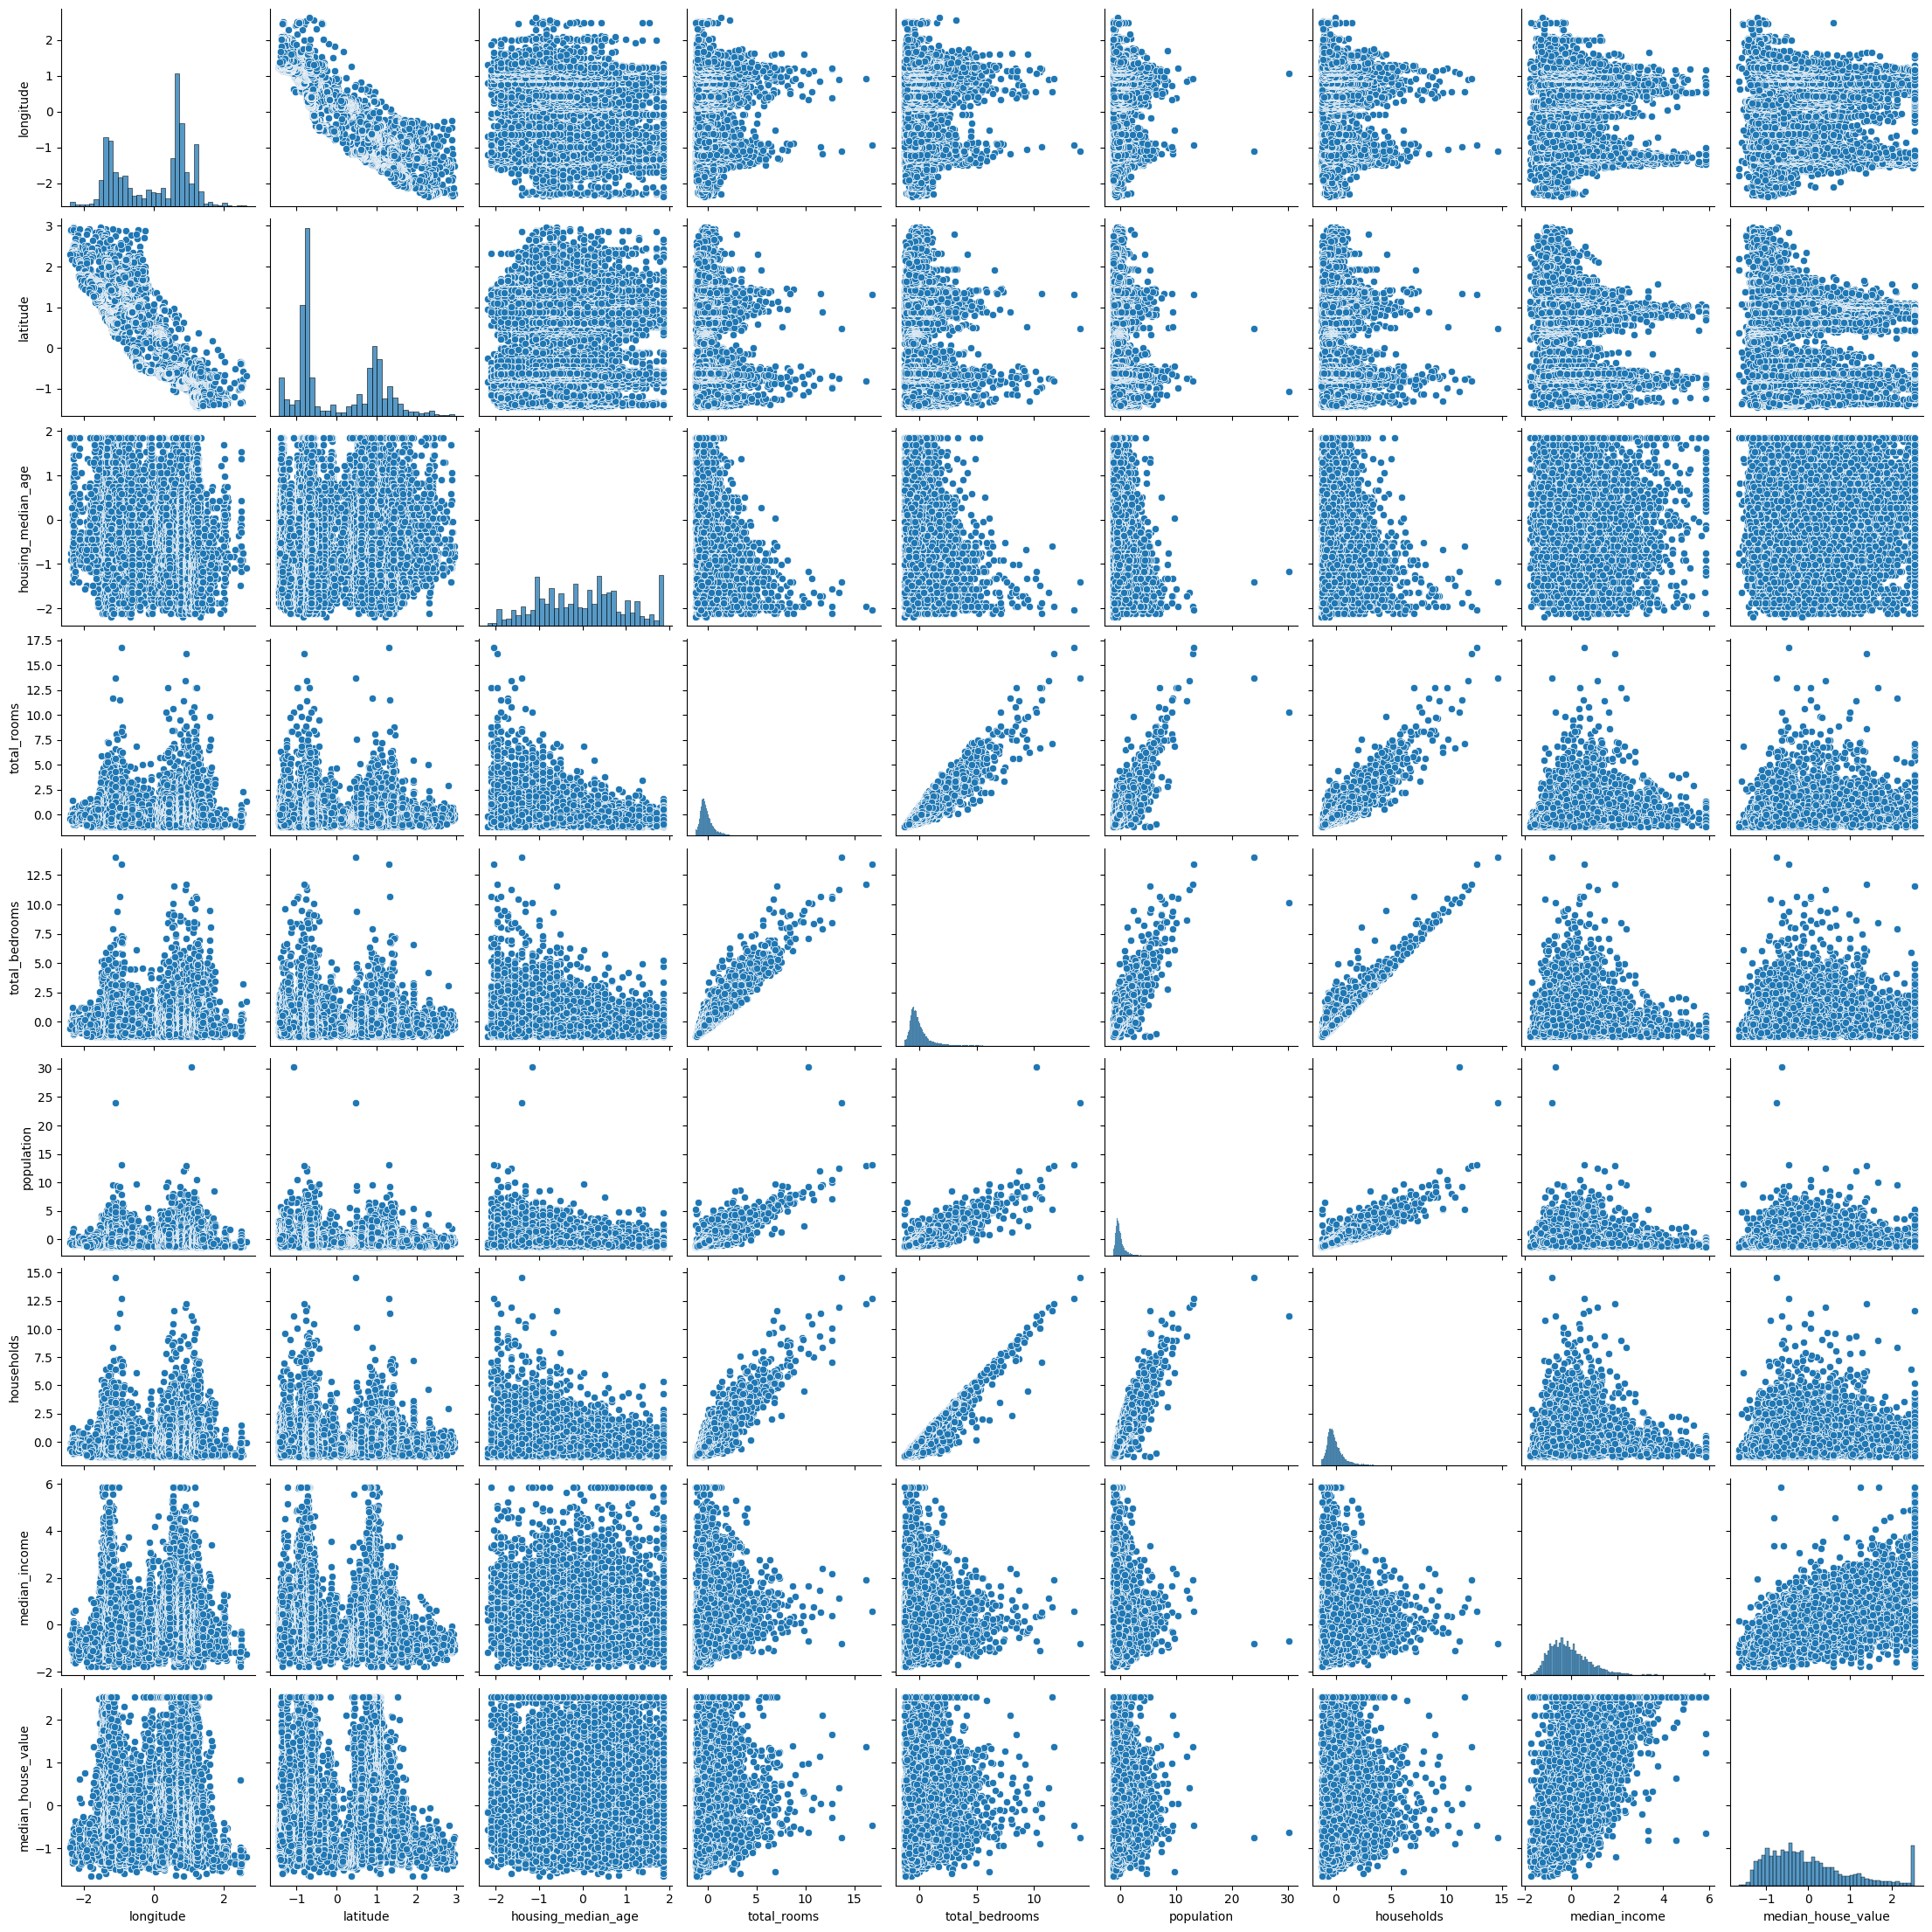

(       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
 17727  -1.112692  0.789581           -1.162141     0.812504        0.916356   
 2057   -0.029603  0.471273            0.346814    -0.732424       -0.846920   
 6453    0.754014 -0.708339           -0.288535     0.574083        0.735994   
 4619    0.629234 -0.731744           -0.050279    -0.125619        0.975686   
 15266   1.148318 -1.213887           -0.129698    -0.364954       -0.346178   
 ...          ...       ...                 ...          ...             ...   
 11397   0.798935 -0.895579           -0.367954     0.162225       -0.089874   
 12081   1.013556 -0.876855           -1.876909     1.468732        1.179780   
 5447    0.574331 -0.759830            1.061582    -0.477071       -0.400761   
 866    -1.232481  0.906606           -1.320978     1.410614        1.248602   
 15948  -1.427138  0.981502            1.855769     0.441831        0.474944   
 
        population  households  median

In [2]:
# Описание датасета
df_description = df.describe(include='all')
df_info = df.info()
df_head = df.head()

df_description, df_info, df_head

# Предобработка данных
df = df.dropna()  # Избавляемся от пропусков

# Временно убираем категориальные признаки
categorical_columns = df.select_dtypes(include=['object']).columns
df_temp = df.drop(categorical_columns, axis=1)

# Нормализация численных данных
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = df_temp.select_dtypes(include=['float64', 'int64']).columns
df_temp[numerical_features] = scaler.fit_transform(df_temp[numerical_features])

# Визуализация heatmap-матрицы корреляции признаков
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df_temp.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляционная матрица признаков')
plt.show()

# Визуализация взаимосвязи между target-переменной и признаками
sns.pairplot(df_temp)
plt.show()

# Разделение выборки на обучающую и тестовую
from sklearn.model_selection import train_test_split

X = df_temp.drop('median_house_value', axis=1)
y = df_temp['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test


3

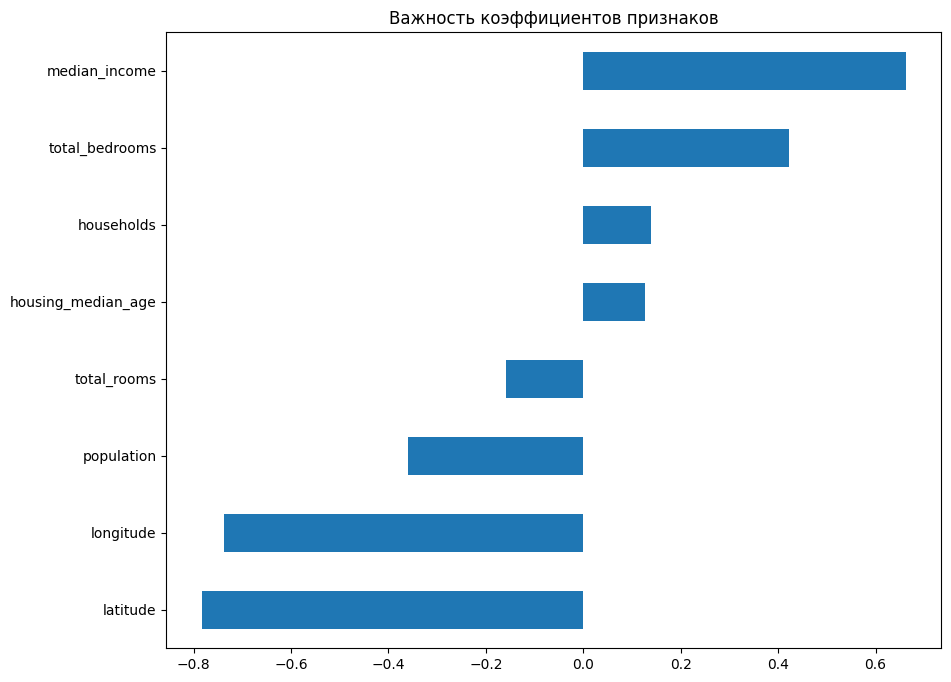

(0.36937912753141555,
 0.4450438119212104,
 0.6400865688993735,
 longitude            -0.738469
 latitude             -0.783506
 housing_median_age    0.125999
 total_rooms          -0.159782
 total_bedrooms        0.422826
 population           -0.360853
 households            0.137905
 median_income         0.662955
 dtype: float64,
 -0.0021476958394410707)

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Обучение модели
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказания на тестовой выборке
y_pred = model.predict(X_test)

# Метрики модели
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Коэффициенты модели
coefficients = pd.Series(model.coef_, index=X_train.columns)
intercept = model.intercept_

# Важность коэффициентов
plt.figure(figsize=(10, 8))
coefficients.sort_values().plot(kind='barh')
plt.title('Важность коэффициентов признаков')
plt.show()

mse, mae, r2, coefficients, intercept


4

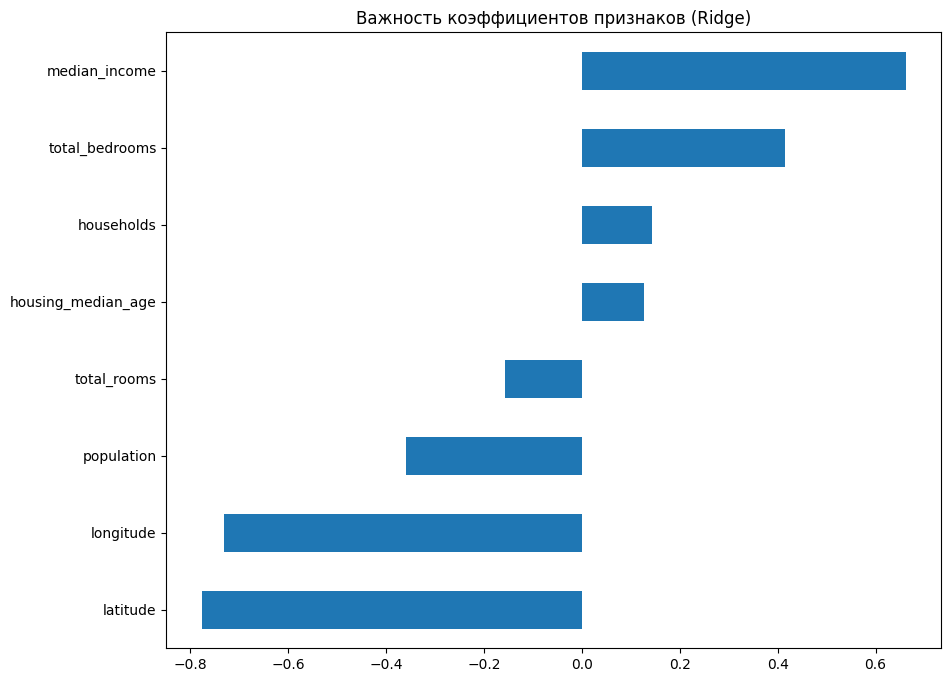

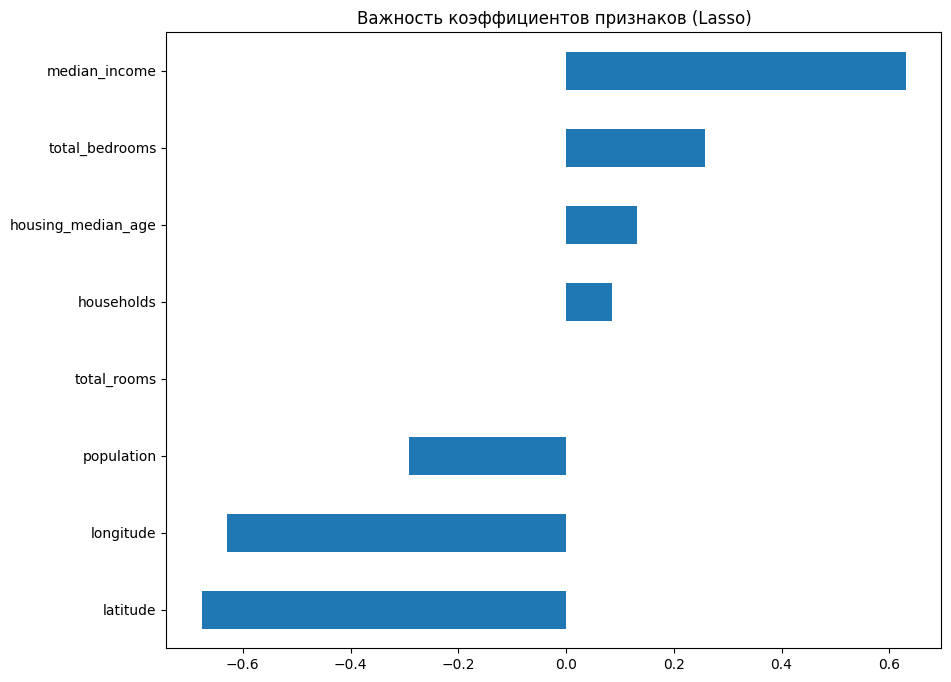

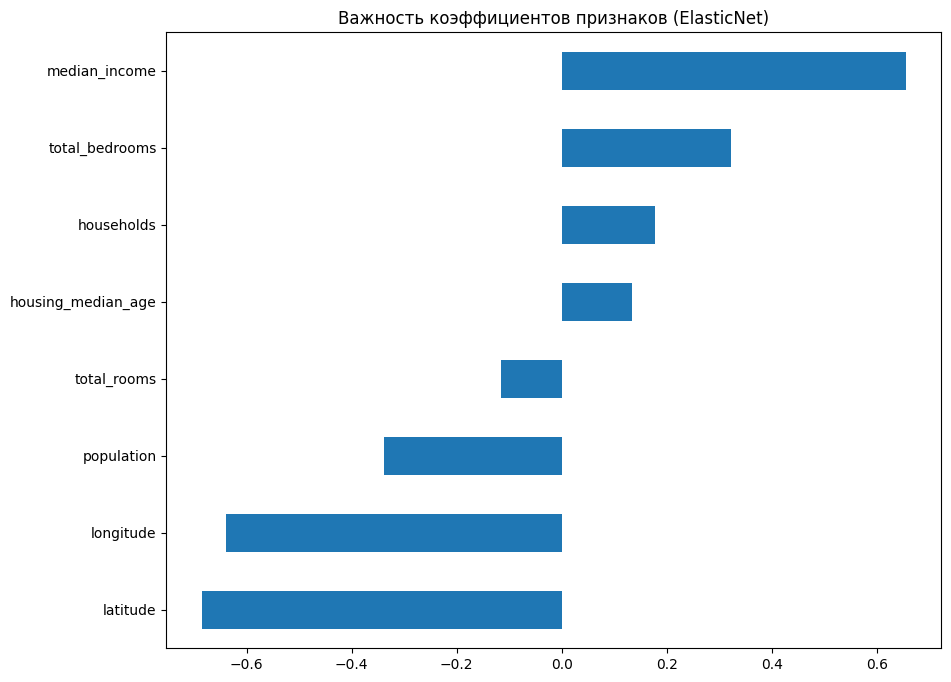

{'Ridge': {'mse': 0.3694468371733419,
  'mae': 0.4450584569419318,
  'r2': 0.6400205943823314,
  'coefficients': longitude            -0.731488
  latitude             -0.776598
  housing_median_age    0.126644
  total_rooms          -0.157373
  total_bedrooms        0.414439
  population           -0.360171
  households            0.143537
  median_income         0.662664
  dtype: float64,
  'intercept': -0.0021317559628459756},
 'Lasso': {'mse': 0.3791197792379002,
  'mae': 0.45145168467286934,
  'r2': 0.6305955307882964,
  'coefficients': longitude            -0.628623
  latitude             -0.676228
  housing_median_age    0.131479
  total_rooms          -0.000000
  total_bedrooms        0.257096
  population           -0.291398
  households            0.084927
  median_income         0.631511
  dtype: float64,
  'intercept': -0.0019293939254911236},
 'ElasticNet': {'mse': 0.3724214794900753,
  'mae': 0.4468208063560322,
  'r2': 0.6371221801441811,
  'coefficients': longitude      

In [4]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV

# Параметры для GridSearchCV
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
elastic_params = {'alpha': [0.01, 0.1, 1, 10, 100], 'l1_ratio': [0.1, 0.5, 0.9]}

# Ridge
ridge = Ridge()
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)
best_ridge = ridge_grid.best_estimator_

# Lasso
lasso = Lasso()
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train, y_train)
best_lasso = lasso_grid.best_estimator_

# ElasticNet
elastic = ElasticNet()
elastic_grid = GridSearchCV(elastic, elastic_params, cv=5, scoring='neg_mean_squared_error')
elastic_grid.fit(X_train, y_train)
best_elastic = elastic_grid.best_estimator_

# Метрики для лучших моделей
models = {'Ridge': best_ridge, 'Lasso': best_lasso, 'ElasticNet': best_elastic}
results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    coefficients = pd.Series(model.coef_, index=X_train.columns)

    results[name] = {
        'mse': mse,
        'mae': mae,
        'r2': r2,
        'coefficients': coefficients,
        'intercept': model.intercept_
    }

    # Важность коэффициентов
    plt.figure(figsize=(10, 8))
    coefficients.sort_values().plot(kind='barh')
    plt.title(f'Важность коэффициентов признаков ({name})')
    plt.show()

results


5

In [5]:
# Восстановление исходных датафреймов
X_train_cat, X_test_cat = X_train.copy(), X_test.copy()
X_train_cat[categorical_columns] = df[categorical_columns].loc[X_train.index]
X_test_cat[categorical_columns] = df[categorical_columns].loc[X_test.index]

# Кодирование категориальных признаков
X_train_cat = pd.get_dummies(X_train_cat, drop_first=True)
X_test_cat = pd.get_dummies(X_test_cat, drop_first=True)


6

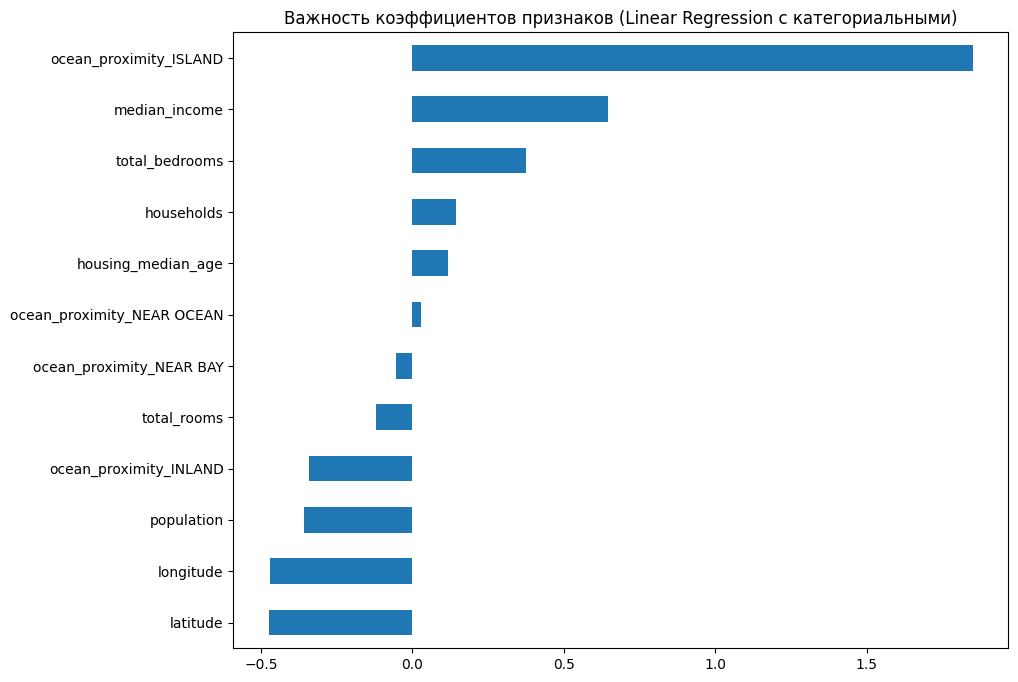

(0.36039526073547834,
 0.4367338817223548,
 0.6488402154431993,
 longitude                    -0.470517
 latitude                     -0.474845
 housing_median_age            0.117956
 total_rooms                  -0.119682
 total_bedrooms                0.376005
 population                   -0.357427
 households                    0.142880
 median_income                 0.646235
 ocean_proximity_INLAND       -0.339940
 ocean_proximity_ISLAND        1.850889
 ocean_proximity_NEAR BAY     -0.053992
 ocean_proximity_NEAR OCEAN    0.027431
 dtype: float64,
 0.10753549650860213)

In [6]:
# Обучение моделей на данных с категориальными признаками

# Linear Regression
model_cat = LinearRegression()
model_cat.fit(X_train_cat, y_train)
y_pred_cat = model_cat.predict(X_test_cat)
mse_cat = mean_squared_error(y_test, y_pred_cat)
mae_cat = mean_absolute_error(y_test, y_pred_cat)
r2_cat = r2_score(y_test, y_pred_cat)
coefficients_cat = pd.Series(model_cat.coef_, index=X_train_cat.columns)

# Визуализация важности коэффициентов
plt.figure(figsize=(10, 8))
coefficients_cat.sort_values().plot(kind='barh')
plt.title('Важность коэффициентов признаков (Linear Regression с категориальными)')
plt.show()

mse_cat, mae_cat, r2_cat, coefficients_cat, model_cat.intercept_


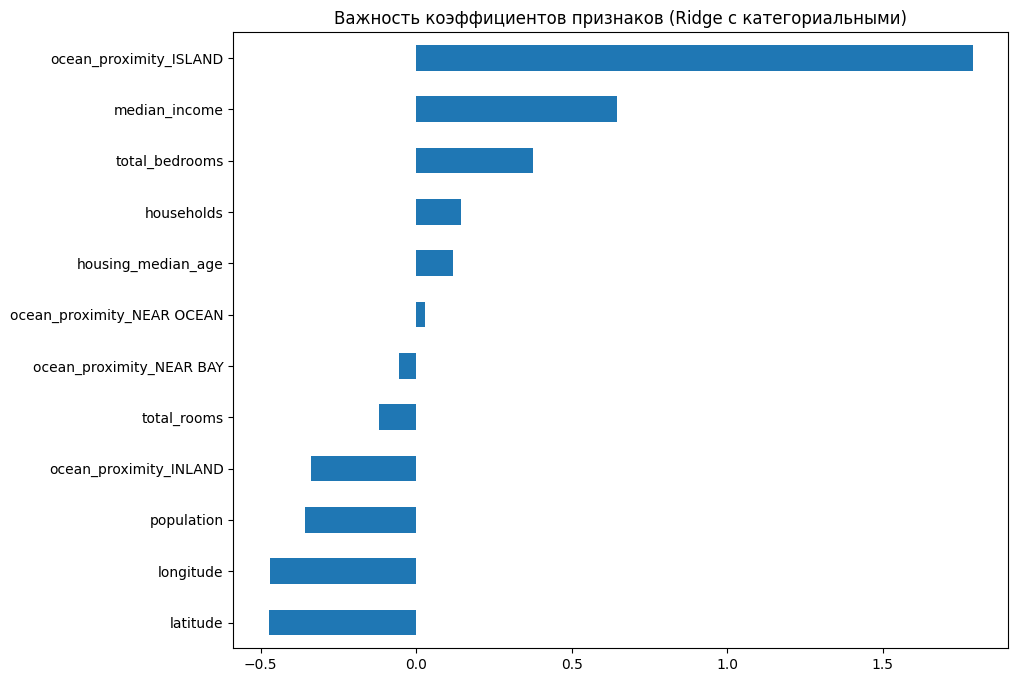

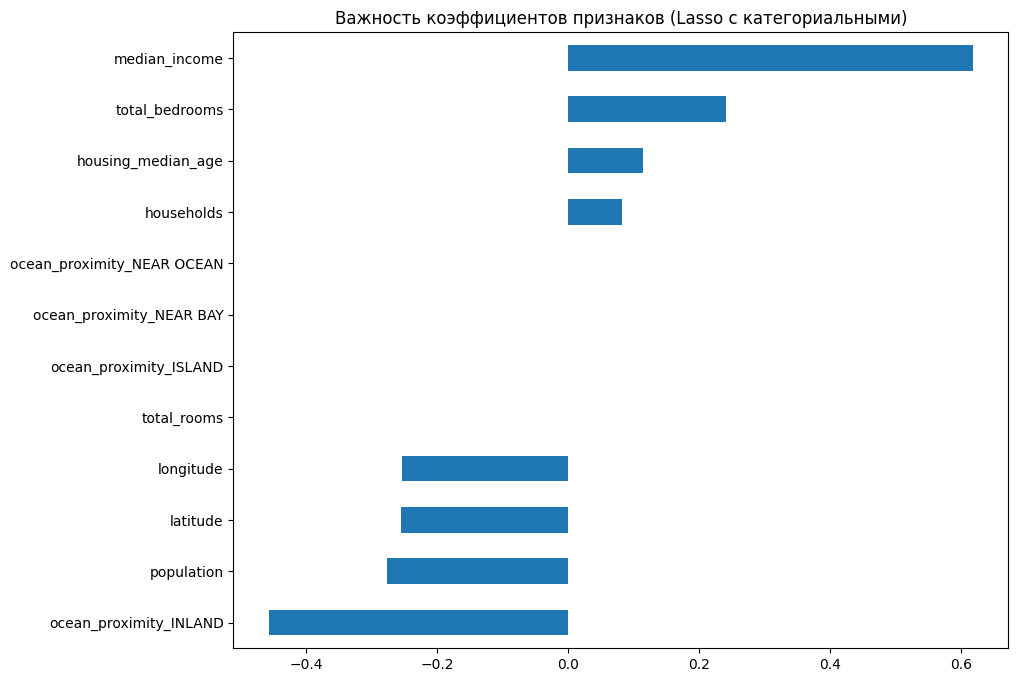

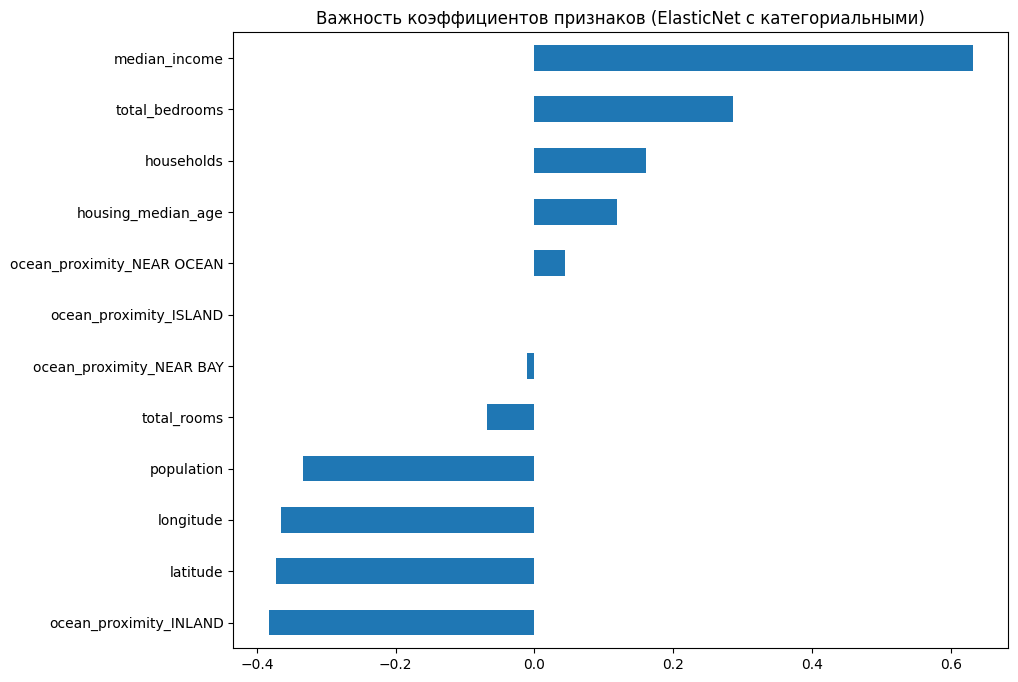

{'Ridge': {'mse': 0.36031999040340884,
  'mae': 0.4367083088815158,
  'r2': 0.6489135569004069,
  'coefficients': longitude                    -0.470508
  latitude                     -0.474844
  housing_median_age            0.117969
  total_rooms                  -0.119641
  total_bedrooms                0.376020
  population                   -0.357427
  households                    0.142824
  median_income                 0.646217
  ocean_proximity_INLAND       -0.339961
  ocean_proximity_ISLAND        1.791122
  ocean_proximity_NEAR BAY     -0.054002
  ocean_proximity_NEAR OCEAN    0.027409
  dtype: float64,
  'intercept': 0.10755740731705074},
 'Lasso': {'mse': 0.3690429521191686,
  'mae': 0.4405977608072084,
  'r2': 0.6404141294924208,
  'coefficients': longitude                    -0.252826
  latitude                     -0.255020
  housing_median_age            0.114520
  total_rooms                  -0.000000
  total_bedrooms                0.241337
  population             

In [7]:
# Ridge
ridge_grid.fit(X_train_cat, y_train)
best_ridge_cat = ridge_grid.best_estimator_

# Lasso
lasso_grid.fit(X_train_cat, y_train)
best_lasso_cat = lasso_grid.best_estimator_

# ElasticNet
elastic_grid.fit(X_train_cat, y_train)
best_elastic_cat = elastic_grid.best_estimator_

models_cat = {'Ridge': best_ridge_cat, 'Lasso': best_lasso_cat, 'ElasticNet': best_elastic_cat}
results_cat = {}

for name, model in models_cat.items():
    y_pred = model.predict(X_test_cat)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    coefficients = pd.Series(model.coef_, index=X_train_cat.columns)

    results_cat[name] = {
        'mse': mse,
        'mae': mae,
        'r2': r2,
        'coefficients': coefficients,
        'intercept': model.intercept_
    }

    # Важность коэффициентов
    plt.figure(figsize=(10, 8))
    coefficients.sort_values().plot(kind='barh')
    plt.title(f'Важность коэффициентов признаков ({name} с категориальными)')
    plt.show()

results_cat


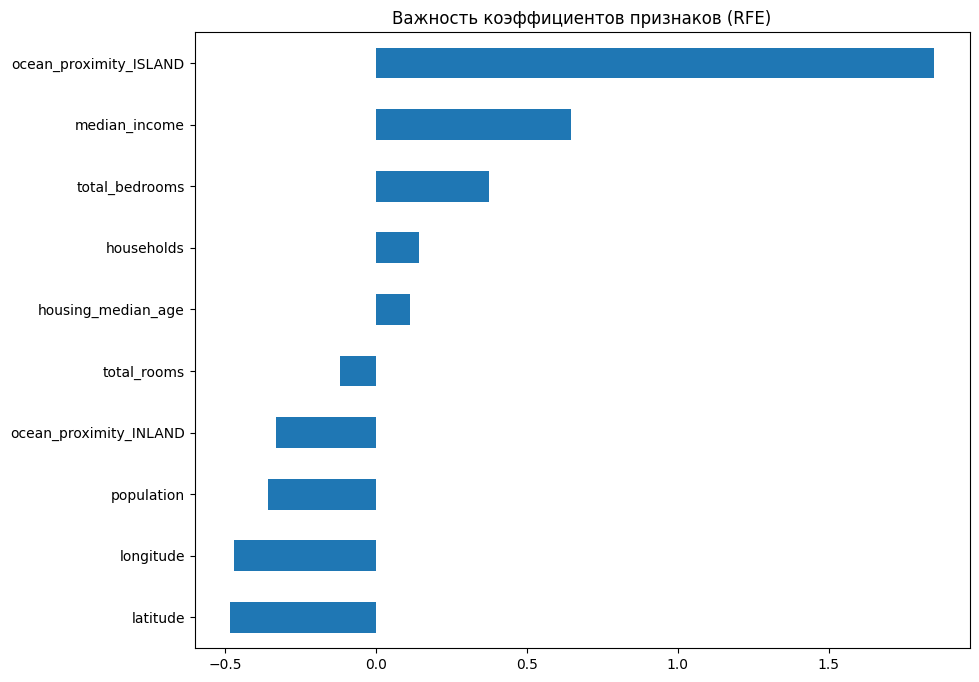

(0.3602592704348556,
 0.4369507831458699,
 0.648972720861198,
 longitude                -0.470267
 latitude                 -0.483644
 housing_median_age        0.114154
 total_rooms              -0.119006
 total_bedrooms            0.374425
 population               -0.357074
 households                0.142046
 median_income             0.644963
 ocean_proximity_INLAND   -0.332323
 ocean_proximity_ISLAND    1.849690
 dtype: float64,
 0.10261598194316636)

In [9]:
from sklearn.feature_selection import RFE

# Recursive Feature Elimination
rfe = RFE(model_cat, n_features_to_select=10)
rfe.fit(X_train_cat, y_train)

# Предсказания и метрики
y_pred_rfe = rfe.predict(X_test_cat)
mse_rfe = mean_squared_error(y_test, y_pred_rfe)
mae_rfe = mean_absolute_error(y_test, y_pred_rfe)
r2_rfe = r2_score(y_test, y_pred_rfe)
coefficients_rfe = pd.Series(rfe.estimator_.coef_, index=X_train_cat.columns[rfe.support_])

# Визуализация важности коэффициентов
plt.figure(figsize=(10, 8))
coefficients_rfe.sort_values().plot(kind='barh')
plt.title('Важность коэффициентов признаков (RFE)')
plt.show()

mse_rfe, mae_rfe, r2_rfe, coefficients_rfe, rfe.estimator_.intercept_


7

In [10]:
# Выводы по результатам
best_model_no_cat = min(results, key=lambda x: results[x]['mse'])
best_model_cat = min(results_cat, key=lambda x: results_cat[x]['mse'])

print(f'Лучший регрессор без категориальных признаков: {best_model_no_cat}')
print(f"Метрики: MSE={results[best_model_no_cat]['mse']}, MAE={results[best_model_no_cat]['mae']}, R2={results[best_model_no_cat]['r2']}")

print(f'Лучший регрессор с категориальными признаками: {best_model_cat}')
print(f"Метрики: MSE={results_cat[best_model_cat]['mse']}, MAE={results_cat[best_model_cat]['mae']}, R2={results_cat[best_model_cat]['r2']}")

print(f'Метрики модели после RFE: MSE={mse_rfe}, MAE={mae_rfe}, R2={r2_rfe}')


Лучший регрессор без категориальных признаков: Ridge
Метрики: MSE=0.3694468371733419, MAE=0.4450584569419318, R2=0.6400205943823314
Лучший регрессор с категориальными признаками: Ridge
Метрики: MSE=0.36031999040340884, MAE=0.4367083088815158, R2=0.6489135569004069
Метрики модели после RFE: MSE=0.3602592704348556, MAE=0.4369507831458699, R2=0.648972720861198
